# cdBoundary

> A very fast 2.5D **concave hull** algorithm by distance implemented in Python

A very fast 2.5D **concave hull** algorithm by distance implemented in Python.  

Rather than using a factor between 0 and 1 as most *Concave Hull* or *Alpha Shape* algorithms this implementation uses *maximum edge length* (`tol`) as a paramater. 

The library was needed specific for *survey* or *LiDAR* data for engineering applications.

## Install

```sh
git clone https://github.com/civildot/cdBoundary
cd cdBoundary
python setup.py install
```

## Usage

### 1. As a library

The points should be in list format with coordinate pairs:  
`[[x1, y1], [x2, y2], [x3, y3], ...]`  or  
`[[x1, y1, z1], [x2, y2, z2], [x3, y3, z3], ...]`


All edge lengths exceeding `tol` parameter will be attempted to be removed. This parameter's unit will thus be the same as your coordinates. Wether it is meters, feet or degrees.  

The `../examples/points-1k.json` dataset was borrowed with thanks from [concaveman](https://github.com/mapbox/concaveman).

In [ ]:
import json
from cdBoundary.boundary import ConcaveHull

ch = ConcaveHull()
with open('../examples/points-1k.json') as source:
    pts = json.load(source)
ch.loadpoints(pts)
ch.calculatehull(tol=0.0025)

The result is a `shapely` Polygon at `ch.hull`.

In [ ]:
print('Geometry type:', ch.hull.geom_type)
coords = ch.boundary_points()
print()
print('The first 5 coordinates of the concave hull is:')
for i in range(5):
    print(i+1, '.', coords[i], sep='')

Geometry type: Polygon

The first 5 coordinates of the concave hull is:
1.(-122.08441, 37.384634)
2.(-122.0832, 37.383161)
3.(-122.08214, 37.3812)
4.(-122.08204, 37.380184)
5.(-122.08216, 37.379173)


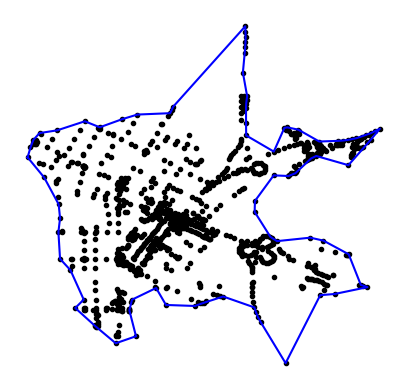

In [ ]:
ch.plot()

If there is an uncertianty on which value to use for `tol` the `estimate` function can be used to provide an estimate. The default percentile `perc` is 92.5%. At this value only outside border edges longer than 92.5% of all the edges will be attempted to be removed.

In [ ]:
print('There is', len(coords), 'vertices on the current polygon.')
print('The suggested value to use is', round(ch.estimate(), 10))
ch.calculatehull(tol=ch.estimate())
print()
print('There is', len(ch.boundary_points()), 'vertices on the new polygon.')

There is 83 vertices on the current polygon.
The suggested value to use is 0.0017366632

There is 164 vertices on the new polygon.


The low value for the `estimate()` *(much smaller than 1)* suggest that the coordinates are in degress. When working in feet or meters it will be much larger.

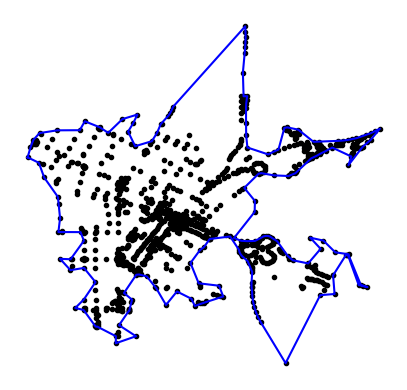

In [ ]:
ch.plot()

### 2. Working directly with files

[Fiona](https://github.com/Toblerity/Fiona) is used to read point data directly from files. The resulting `Polygon` can also be written to the file format supported by `Fiona`.

In [ ]:
from cdBoundary.fileio import FileIO

fch = FileIO()
fch.file2points('../examples/Bandelierkop_survey.shp')
fch.write2file(tol=35)

In the same folder as your input file there is now a file named `concave_hull.shp` *(default)* containing the concave hull as a polygon.

or

In [ ]:
with open('../examples/points-1k.json') as source:
    pts = json.load(source)
fch = FileIO()
fch.loadpoints(pts)
fch.calculatehull(tol=ch.estimate())
fch.write2file(outfile='../examples/concave_hull2.shp', driver='ESRI Shapefile')

## Documentation

[https://civildot.github.io/cdBoundary](https://civildot.github.io/cdBoundary/)

## Requirements / Dependencies

- [shapely](https://github.com/shapely/shapely)
- [matplotlib](https://github.com/matplotlib/matplotlib)
- [numpy](https://github.com/numpy/numpy)
- [Fiona](https://github.com/Toblerity/Fiona) >= 1.9.4

## Algorithm

This concave hull implementation is based on the algorithm developed by Duckham et al. (2008) in the paper "Efficient generation of simple polygons for characterizing the shape of a set of points in the plane", available [here](http://www.geosensor.net/papers/duckham08.PR.pdf). 

## Wish list

Possible features or enhancements in the future. Nothing planned. The library is already satisfactory for our speicific application.

- ~~Plot output for quick visualization~~ *Implemented 15 July 2023*
- ~~Support  an elevation (Z value) on the polygon vertices~~ *Implemented 15 July 2023*
- Support for holes
- cli (Command Line Interface)
- Provide as a QGIS Plugin
- Implement it as a [Streamlit](https://github.com/streamlit) application

## Similar Implementations

A lot of *concave-hull* and *alpha-shape* implementations on Github, but very few using maximum edge length as an argument.  

1. The greatest influence on *cdBoundary* is **[http://www.rotefabrik.free.fr/concave_hull](http://www.rotefabrik.free.fr/concave_hull)** which can be accessed through the [OpenJUMP](http://www.openjump.org/) user interface.
2. The `lasboundary` command line program from **[LASTools](https://lastools.github.io/)** is unfortunately proprierity but also edge length as an argument and is very powerful.
3. MacRoad, later **[HighRoad](http://www.interstudio.net/highroade.html)**, an ancient road design and earthworks program. Still being used today but no longer actively maintained. It has a `Join Edge Points` function which is a concave hull implementation already implemented in 1988. It has an `estimate` button which inspired the `estimate` function for cdBoundary.
4. **[jtsop](https://github.com/locationtech/jts/blob/master/doc/JTSOp.md)** from the *JTS* (Java Topology Suite) has got a `Construction.concaveHullByLen` function as well.